# Evaluating Classifiers


Classification is a fundamental task in machine learning, and it's essential to know how to assess the performance of your classifiers.

Throughout this notebook, we'll cover the following key topics:

- **Generating Synthetic Data**: We'll start by creating synthetic datasets with a specific number of features and multiple classes for both binary and multiclass classification tasks. We will use these synthetic data to train ourselves on classification and evaluation. 

- **Binary Classification with Logistic Regression**: You'll learn how to train a logistic regression classifier on synthetic binary data and evaluate its performance on both training and test sets. We'll explore essential evaluation metrics like confusion matrices and classification reports.

- **Visualizing Decision Boundaries**: We'll visualize the decision boundaries of our classifiers using scatter plots and contour plots to gain insights into how they separate different classes.

- **Multiclass Classification**: We'll extend our analysis to multiclass classification, where we have more than two classes. We'll adapt our approach to handle multiclass data and evaluate the classifiers accordingly.


We start by importing the libraries that we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### **Create Synthetic Datasets**

Now, let's create some artificial data that simulates real-world scenarios. We're going to make up a dataset where there are two groups of data points that overlap.


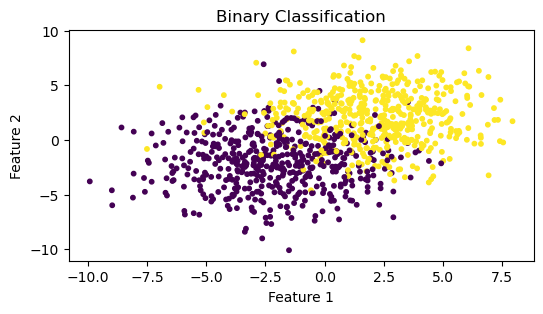

In [11]:
# Create a synthetic dataset for binary classification
centers_binary = np.array([[-2, -2], [2, 2]])
std_dev = 2.5
X_binary, y_binary = make_blobs(n_samples=1000, centers=centers_binary, 
                                n_features=2, random_state=123, cluster_std=std_dev)

# Visualize the dataset
plt.figure(figsize = (6,3))
plt.scatter(X_binary[:, 0], X_binary[:, 1], c=y_binary, s=10)
plt.title("Binary Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### **Split Datasets into Training and Testing**

In [13]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=123)


In [17]:
X_train_bin.shape
y_train_bin.shape

(700,)

### **Train Model**

In [19]:
# For binary classification
lr_binary = LogisticRegression()
lr_binary.fit(X_train_bin, y_train_bin)


LogisticRegression()

### **Predictions and evaluation**

Now that we've created our synthetic dataset and trained our logistic regression model, it's time to assess how well it's performing. 

Scikit-learn provides us with several valuable functions for evaluating classifiers. Let's take a quick look at some of the key ones we'll be using. 

- **Confusion Matrix**: This tool helps us see how our model is doing in terms of true positives, true negatives, false positives, and false negatives.

- **Classification Report**: This report gives us a detailed breakdown of various metrics, including precision, recall, F1-score, and support, for each class. 

*To understand the output of these functions, it is recommended that you have at hand all the definitions of the previous theory video*


The first thing we need to do to evaluate a classifier is to make predictions on the test set

In [20]:
# Predictions
y_pred_bin = lr_binary.predict(X_test_bin)

Then, we will compare the predictions of the model (called here `y_pred_bin`) with the true data obtained in the split (`y_test_bin`).

We will use two functions. confusion_matrix, and classification_report, both available in sklearn.metrics, and both accepting two inputs, the list of true data, and the list of predictions. 

**Notice that the first argument is the true data, and the second argument is the predicted data.**

Let's go first with the confusion matrix

In [21]:
print(confusion_matrix(y_test_bin, y_pred_bin))
print("Binary Accuracy Score:", accuracy_score(y_test_bin, y_pred_bin))

[[131  16]
 [ 14 139]]
Binary Accuracy Score: 0.9


In scikit-learn's confusion_matrix,
- the rows represent the true data (ground truth), and the columns represent the predicted data.
- the first class is the zero class (therefore the True Negative, which is not the usual convention in the literature, so be careful!)

The confusion matrix generated by the function will have the following layout:

|                   | Predicted Negative (0) | Predicted Positive (1) |
|-------------------|------------------------|------------------------|
| Actual Negative (0) | True Negative (TN)     | False Positive (FP)    |
| Actual Positive (1) | False Negative (FN)    | True Positive (TP)     |

That is

|                   | Predicted Negative (0) | Predicted Positive (1) |
|-------------------|------------------------|------------------------|
| Actual Negative (0) | 131     | 16   |
| Actual Positive (1) | 14    | 139     |



We can verify this very easily in the following way

In [7]:
# True Negatives: true and pred are 0
TN = sum((y_test_bin == 0) & (y_pred_bin == 0) )

# True Positives: true and pred are 1
TP = sum((y_test_bin == 1) & (y_pred_bin == 1) )

# False Positives: true is 0 and pred is 1
FP = sum((y_test_bin == 0) & (y_pred_bin == 1) )


# False Negative: true is 1 and pred is 0
FN = sum((y_test_bin == 1) & (y_pred_bin == 0) )

print(f'TN = {TN}')
print(f'TP = {TP}')
print(f'FP = {FP}')
print(f'FN = {FN}')

TN = 131
TP = 139
FP = 16
FN = 14


Once we have the confusion matrix (and therefore the TP, TN, FP, FN values) we can then compute different metrics such as:
- Accuracy
- Recall
- Precision
- F1-score
- etc.

using the formulas given in the theory video.

Alternatively, we can use the accuracy_score and the classification_report functions to obtain all these metrics

In [8]:
print("Binary Accuracy Score:", accuracy_score(y_test_bin, y_pred_bin))

print("\nBinary Classification Report:")
print(classification_report(y_test_bin, y_pred_bin))






Binary Accuracy Score: 0.9

Binary Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       147
           1       0.90      0.91      0.90       153

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



We can observe that there are metric values reported for each of the classes. The interpretation is as follows:

- If you consider the 0-class as the 'positive event,' then the precision, recall, and F1-score pertain to the values in the first row.

- Conversely, if you consider the 1-class as the 'positive event,' then the precision, recall, and F1-score correspond to the values in the second row.


The 'support' value refers to the number of data points in the true test set that belong to a specific label. For example, if we have a 'support' value of 147 for the label '0' and 153 for the label '1,' it means that there are 147 data points in the true test set with the '0' label and 153 data points with the '1' label. Checking these 'support' values is essential to ensure that our dataset is well-balanced, with a relatively similar number of data points in each class.


The classification report also offers values for **macro average** and **weighted average**.

- **Macro Avg (Macro Average)**: This metric computes the average of the scores for each class without considering class imbalance. It treats each class equally, giving it the same weight. In other words, it calculates the metric independently for each class and then takes the unweighted average across all classes. Macro average is useful when you want to evaluate the model's overall performance across different classes, regardless of their distribution in the dataset.

- **Weighted Avg (Weighted Average)**: This metric computes the weighted average of the scores for each class, considering class imbalance. It takes into account the number of data points in each class, giving more weight to classes with more samples. Weighted average is helpful when you have imbalanced datasets, as it provides a more representative measure of overall model performance. It considers both precision and recall for each class and computes a weighted average based on the class distribution.

## **Plot Boundary**

Since our data is two-dimensional, we can create a scatter plot in which each point is colored according to its class, and we can simultaneously shade the background based on the model's predictions.

This is an effective way to visualize the model's ability to correctly classify our data points. The following code provides a template for doing so.

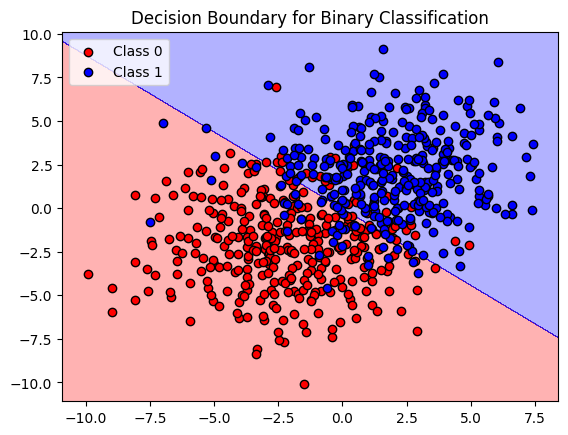

In [9]:
def plot_decision_boundary(X, y, model, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
    # Create a custom colormap to match the class colors
    from matplotlib.colors import ListedColormap
    colors = ['#FF0000', '#0000FF']  # Red for class 0, Blue for class 1
    cmap_custom = ListedColormap(colors)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_custom)
    # Plot points for Class 0 and Class 1 separately with legends
    for i, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label][:, 0], X[y == class_label][:, 1], 
                    edgecolors='k', c = colors[i], label=f"Class {class_label}")
    
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundaries
plot_decision_boundary(X_train_bin, y_train_bin, lr_binary, "Decision Boundary for Binary Classification")


## Multiclass Classification

Now, let's explore how the previous analysis can be extended to multiclass classification.

To create a dataset that we can visualize conveniently, we will once again generate a synthetic dataset with two features, enabling us to create plots. However, this time, we will create four different classes labeled as 0, 1, 2, and 3.

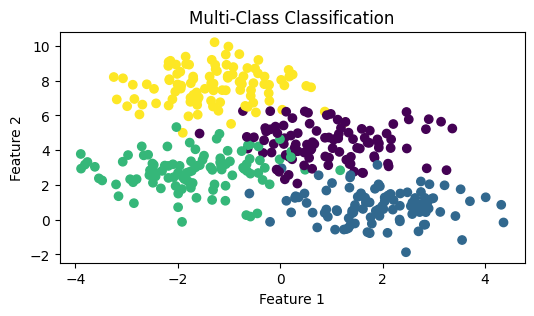

In [10]:
# Create a synthetic dataset for binary classification
std_dev = 1
n_features = 2
# Create a synthetic dataset for multi-class classification
X_multi, y_multi = make_blobs(n_samples=400, centers=4, n_features=n_features,
                              random_state=0,cluster_std=std_dev )

# Visualize the dataset
plt.figure(figsize = (6,3))
plt.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi)
plt.title("Multi-Class Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


We see that our data has 4 classes, and that some of the points are overlapping. 

As previously done in the binary case, let's split the data, fit a logistic model, and compute the model's predictions on the test set

In [11]:
#split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.5, random_state=42)

# logistic regression for multi-class classification
lr_multi = LogisticRegression(max_iter=1000)
lr_multi.fit(X_train_multi, y_train_multi)

# Predictions
y_pred_multi = lr_multi.predict(X_test_multi)

We can now use the exact same functions as before, but this time we will obtain more information.

In [12]:
cm = confusion_matrix(y_test_multi, y_pred_multi)
print("Multi-Class Confusion Matrix:")
print(cm)

Multi-Class Confusion Matrix:
[[47  1  3  0]
 [ 0 44  0  0]
 [ 4  1 50  0]
 [ 4  0  1 45]]


First, we observe that the confusion matrix now has as many columns as there are labels. The interpretation remains the same as before. For instance, the value in the 4th row and 1st column (cm[3, 0]) corresponds to instances with label 3 but with a prediction of 0. We can verify this as follows:

In [13]:
sum((y_test_multi == 3) & (y_pred_multi == 0))

4

In cases with more than two classes, determining what constitutes a 'positive' or 'negative' event may not be as straightforward as in binary classification. However, we have a flexible approach to address this complexity. We can select a specific class from the multiple classes and designate it as the 'positive' class, while considering all other classes as 'negative.' We then proceed to compute various classification metrics in this context.

To comprehensively evaluate the model's performance, we repeat this process for each class, designating it as 'positive' one at a time. This allows us to obtain a comprehensive picture of how the classifier performs with each class as the positive event. The classification report provides precisely this information, offering insights into precision, recall, F1-score, and other metrics for each class when treated as 'positive.'

In [14]:

print("Multi-Class Classification Report:")
print(classification_report(y_test_multi, y_pred_multi))




Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       0.96      1.00      0.98        44
           2       0.93      0.91      0.92        55
           3       1.00      0.90      0.95        50

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



The primary 'global' metric is accuracy, which is calculated as the percentage of correct predictions. It is determined by taking the sum of the elements in the diagonal of the confusion matrix (which represent true positives for each class) and dividing it by the total number of data points.


Accuracy can also be obtained alone using the accuracy_score function

In [15]:
print("Multi-Class Accuracy Score:", accuracy_score(y_test_multi, y_pred_multi))

Multi-Class Accuracy Score: 0.93


To extract the numeric values from the classification report in Python, you can parse the report and store the values in a structured data format like a dictionary. You need to use the argument `output_dict=True` in the classification report function. Here's a Python code example to get this done:

In [16]:
# save the classification report into a variable, with output_dict set to True
report = classification_report(y_test_multi, y_pred_multi, output_dict=True)

# Convert the report into a dictionary
report_dict = dict(report)

# Access the precision of the second class (Class 1)
precision_class_1 = report_dict["1"]["precision"]

# Access other metrics as needed
recall_class_2 = report_dict["2"]["recall"]
f1_score_class_2 = report_dict["2"]["f1-score"]

# Print the precision for Class 1
print(f"Precision for Class 1: {precision_class_1}")

# Print the recall for Class 2
print(f"Recall for Class 2: {recall_class_2}")

# Print the accuracy
accuracy = report_dict["accuracy"]
print(f'Accuracy: {accuracy}')

Precision for Class 1: 0.9565217391304348
Recall for Class 2: 0.9090909090909091
Accuracy: 0.93


Finally, as before, we can plot the boundaries on a scatter plot. The code that allows us to do this could be as follows:

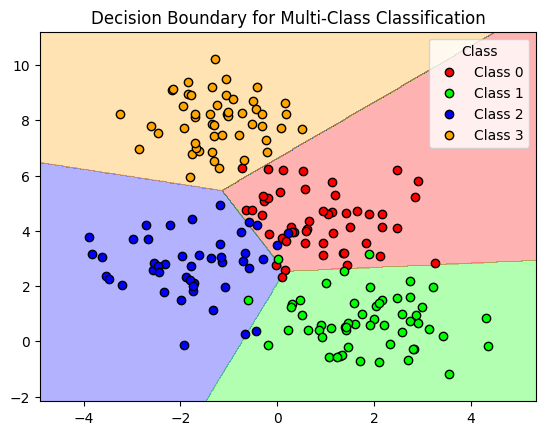

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

def plot_decision_boundary(X, y, model, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create a custom colormap based on the number of unique classes
    from matplotlib.colors import ListedColormap
    class_colors = ['#FF0000', '#00FF00', '#0000FF', '#FFA500']
    cmap_custom = ListedColormap(class_colors)
    
    # Plot the contour with data points using the same colormap
    plt.contourf(xx, yy, Z, alpha=0.3, cmap= cmap_custom)
    # Plot data points with class labels and a legend
    for i, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label][:, 0], X[y == class_label][:, 1], 
                    edgecolors='k', c=class_colors[i], label=f"Class {class_label}")
    
    # Add a legend with class numbers
    plt.legend(loc='best', title="Class")

    plt.title(title)
    plt.show()

# Example usage:
# Plot decision boundaries
plot_decision_boundary(X=X_train_multi, y=y_train_multi, model=lr_multi, title="Decision Boundary for Multi-Class Classification")
